In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
min_age, max_age = 18, 65
min_income, max_income = 15000, 100000

df = pd.DataFrame(columns=['Age', 'Annual Income'])

for i in range(100):
    age = random.randint(min_age, max_age)
    
    # second term in the below equation is used to give older people, higher income
    income = random.randint(min_income, max_income) + (age - min_age) * 3000
    
    df.loc[i] = [age, income]

print(df)

    Age  Annual Income
0    31         101353
1    64         153535
2    55         201288
3    52         152644
4    32          68027
..  ...            ...
95   44         114175
96   39         140273
97   65         191929
98   40         138813
99   51         141935

[100 rows x 2 columns]


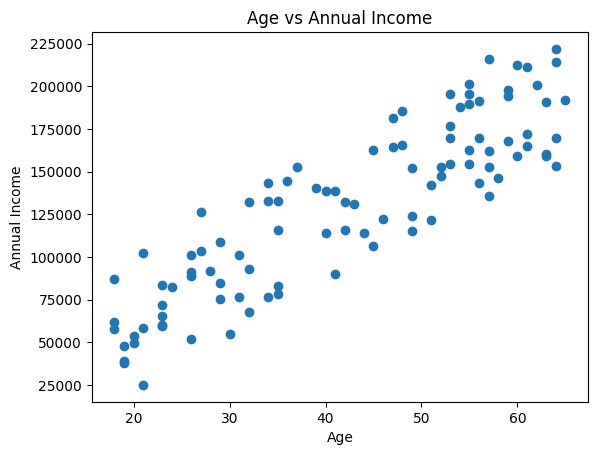

In [3]:
ages = df['Age'].values
incomes = df['Annual Income'].values

plt.scatter(ages, incomes)

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')

plt.show()

In [4]:
n = df.shape[0]
distance_matrix = np.zeros((n,n))
clusters = {}
clusters_removed = set()

for i in range(n):
    # here I am creating initial version of the clusters
    x1, y1 = df.iloc[i]['Age'], df.iloc[i]['Annual Income']
    clusters[i] = [[x1, y1]]
    for j in range(i + 1, n):
        x2, y2 = df.iloc[j]['Age'], df.iloc[j]['Annual Income']
        
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

while len(clusters) > 1:
    # find which clusters that should be joined
    n = distance_matrix.shape[0]
    min_single_link = float("inf")
    clusters_to_be_joined = []
    for i in range(n):
        for j in range(i+1, n):
            # we check if we have previously merged this cluster into some other cluster
            if i not in clusters_removed and j not in clusters_removed:
                if distance_matrix[i][j] < min_single_link and distance_matrix[i][j] != 0:
                    min_single_link = distance_matrix[i][j]
                    clusters_to_be_joined = [[i,j]]
                elif distance_matrix[i][j] == min_single_link and distance_matrix[i][j] != 0:
                    # one more cluster join in this iteration
                    clusters_to_be_joined.append([i, j])

    # joining the clusters and updating the distance_matrix
    for cluster_pair in clusters_to_be_joined:
        # let's try to figure out the order of clusters
        if cluster_pair[0] < cluster_pair[1]:
            new_cluster_index, cluster_to_be_removed = cluster_pair[0], cluster_pair[1]
        else:
            new_cluster_index, cluster_to_be_removed = cluster_pair[1], cluster_pair[0]
        
        # first let's check that we did not previously merged this cluster to another cluster
        # that is possible in the case of one cluster being in more than one cluster pair
        # that is where 2 or more clusters had the same distance from a cluster
        if cluster_to_be_removed not in clusters:
            cluster_to_be_removed = joined_to
        
        # let's put the members of the cluster to be removed into the cluster that will stay
        for data_instance in clusters[cluster_to_be_removed]:
            clusters[new_cluster_index].append(data_instance)
        
        # remove the cluster
        clusters.pop(cluster_to_be_removed)
        # if it is also a pair for another cluster with the same distance
        # we mark the deleted cluster to be in the cluster we joined it to
        joined_to = new_cluster_index
        
        # update the distance matrix table
        for i in range(distance_matrix.shape[0]):
            if i != new_cluster_index and i != cluster_to_be_removed:
                distance1 = distance_matrix[i][new_cluster_index]
                distance2 = distance_matrix[i][cluster_to_be_removed]
                # take the minimum distance to the joined clusters
                distance = min(distance1, distance2)
                distance_matrix[i][new_cluster_index] = distance
                distance_matrix[new_cluster_index][i] = distance
                
#         distance_matrix = np.delete(distance_matrix, cluster_to_be_removed, axis=0)
#         distance_matrix = np.delete(distance_matrix, cluster_to_be_removed, axis=1)
        
        # we keep track of the deleted clusters
        clusters_removed.add(cluster_to_be_removed)